# Human Activity Recognition Using Smartphones Data Set

## Table of Contents

* [1. Usecase](#s1)
* [2. Dataset ETL (Extract Transform Load)](#s2)
* [3. Data quality assessment](#s3)
    * [3.1 Missing values](#s3.1)
    * [3.2 Invalid values](#s3.2)
    * [3.3 Outliers](#s3.3)
* [4. Data exploration](#s4)
* [5. Data visualization](#s5)
* [6. Features engineering](#s6)
    * [6.1 Dimensionality reduction of X with PCA](#s6.1)
    * [6.2 One-hot encoding of y](#s6.2)
* [7. Model performance indicator](#s7)
* [8. Traditional Machine Learning Algorithm (linear SVM)](#s8)
* [9. Deep Learning Algorithm (MLP)](#s9)
    * [9.1 Multi Layer Perceptron training](#s9.1)
    * [9.2 Performance evaluation](#s9.2)
    * [9.3 Performance visualization](#s9.3)
* [10. Conclusion](#s10)


## 1. Usecase <a id="s1"></a>

We'll use the "Human Activity Recognition Using Smartphones Data Set"
[https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones]

This dataset was built thanks to experiments carried out with a group of 30 volunteers within an age bracket of 19-48 years.

Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist.

The aim is to predict the activity performed from the signals measured by the smartphone sensors (accelerometer and gyroscope) 

## 2. Dataset ETL (Extract Transform Load) <a id="s2"></a>

In [1]:
import pandas as pd

# First we read features names, which will be used as column names in our data frames
df_features = pd.read_csv('data/features.txt',delim_whitespace=True, header=None)
colnames = df_features.iloc[:,1].values

# Column names contain duplicates ("e.g. : fBodyAccJerk-bandsEnergy()-1,8")
# we fix this by prefixing column names with their indices
colnames_fixed = []
nbcol = len(colnames)
for i in range(0,nbcol):
        colnames_fixed.append(str(i)+"-"+colnames[i])

#  Read data files
X_train = pd.read_csv('data/train/X_train.txt',delim_whitespace=True,names=colnames_fixed)
y_train = pd.read_csv('data/train/y_train.txt',delim_whitespace=True,header=None)

X_test = pd.read_csv('data/test/X_test.txt',delim_whitespace=True,names=colnames_fixed)
y_test = pd.read_csv('data/test/y_test.txt',delim_whitespace=True,header=None)


print("Summary of the X (input) variables in training dataset:")
print(X_train.info())
print("------------------------------------------------------")
print("Summary of the X (input) variables in testing dataset:")
print(X_test.info())

Summary of the X (input) variables in training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0-tBodyAcc-mean()-X to 560-angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
------------------------------------------------------
Summary of the X (input) variables in testing dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0-tBodyAcc-mean()-X to 560-angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB
None


## 3. Data quality assessment <a id="s3"></a>

### 3.1 Missing values <a id="s3.1"></a>

In [2]:
X_train.isnull().sum()

0-tBodyAcc-mean()-X                         0
1-tBodyAcc-mean()-Y                         0
2-tBodyAcc-mean()-Z                         0
3-tBodyAcc-std()-X                          0
4-tBodyAcc-std()-Y                          0
                                           ..
556-angle(tBodyGyroMean,gravityMean)        0
557-angle(tBodyGyroJerkMean,gravityMean)    0
558-angle(X,gravityMean)                    0
559-angle(Y,gravityMean)                    0
560-angle(Z,gravityMean)                    0
Length: 561, dtype: int64

Apparently the dataset has no missing value.
We will confirm this by calculating the max number of NULL values 
in all columns (both in the training and in the testing data subsets) :

In [3]:
max_na_train = max(X_train.isnull().sum())
max_na_test = max(X_test.isnull().sum())
print("Missing values in training data : {}".format(max_na_train))
print("Missing values in testing data : {}".format(max_na_test))

Missing values in training data : 0
Missing values in testing data : 0


### 3.2 Invalid values <a id="s3.2"></a>

According to the datasets description each feature is scaled and normalized
so that its values should be in range [-1,1] :

In [4]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0-tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
1-tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
2-tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
3-tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
4-tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
"556-angle(tBodyGyroMean,gravityMean)",7352.0,0.008726,0.608303,-1.000000,-0.482273,0.008735,0.506187,0.998702
"557-angle(tBodyGyroJerkMean,gravityMean)",7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
"558-angle(X,gravityMean)",7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
"559-angle(Y,gravityMean)",7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157


We can check that all values are really in range [-1,1] both in training and testing datasets as follows :

In [5]:
train_min= min(X_train.min())
train_max= max(X_train.max())
test_min= min(X_test.min())
test_max= max(X_test.max())
print(f" Training dataset - values are in range [{train_min},{train_max}]")
print(f" Testing dataset - values are in range [{test_min},{test_max}]")


 Training dataset - values are in range [-1.0,1.0]
 Testing dataset - values are in range [-1.0,1.0]


### 3.3 Outliers <a id="s3.3"></a>

We can show that there are outliers in the training dataset
by calculating the IQR (Inter Quartile Range) for each feature variable :

In [6]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).sum()


0-tBodyAcc-mean()-X                         1795
1-tBodyAcc-mean()-Y                         1122
2-tBodyAcc-mean()-Z                         1180
3-tBodyAcc-std()-X                             2
4-tBodyAcc-std()-Y                             0
                                            ... 
556-angle(tBodyGyroMean,gravityMean)           0
557-angle(tBodyGyroJerkMean,gravityMean)       0
558-angle(X,gravityMean)                    1437
559-angle(Y,gravityMean)                     776
560-angle(Z,gravityMean)                     705
Length: 561, dtype: int64

Although outliers display "extreme" values these values are not necessarily invalid. So we'll keep them as they are for now.

## 4. Data exploration <a id="s4"></a>

To study the correlation between columns we will apply a PCA decomposition :

Cumul. variance with 70 features : 95.31099999999996
Cumul. variance with 300 features : 99.92499999999995


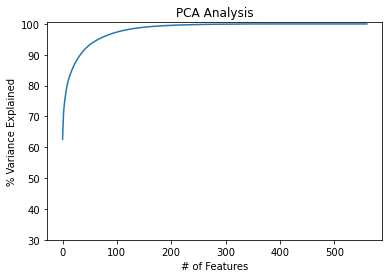

In [7]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca=PCA()
pca.fit(X_train)
variance = pca.explained_variance_ratio_ #calculate variance ratios

cumul_variance=np.cumsum(np.round(variance, decimals=5)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(cumul_variance)


print("Cumul. variance with 70 features :",cumul_variance[70-1] )
print("Cumul. variance with 300 features :",cumul_variance[300-1] )

As indicated above, the 70 first (out of 561)  principal components are enough to keep about 95% of the variance.

With 300 features we keep 99.9% of variance.

## 5. Data  visualization <a id="s5"></a>

Here we show that the distribution of the outcome values is quite balanced
both in training and testing dataset.

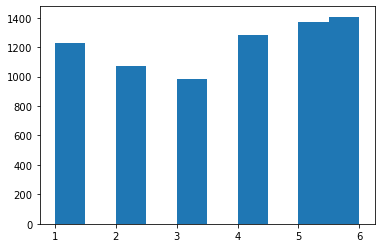

In [8]:
import matplotlib.pyplot as plt

# Training data
plt.hist(y_train[0])
plt.show()


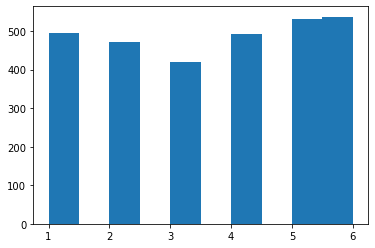

In [9]:
# Testing data
plt.hist(y_test[0])
plt.show()

 NB: 1 = WALKING, 2 = WALKING_UPSTAIRS, 3 = WALKING_DOWNSTAIRS, 4 = SITTING, 5 = STANDING, 6 = LAYING

## 6. Features Engineering <a id="s6"></a>

### 6.1 Dimensionality reduction of X with PCA <a id="s6.1"></a>

In order to remove noise and redundancy in data we'll keep only the 300 first components built from PCA (see section 4.)

In [10]:
pca=PCA(n_components=300)

# IMPORTANT : values are already scaled and centered so we don't need to pre-process them: we can fit PCA directly.
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### 6.2 One-hot encoding of y <a id="s6.2"></a>


To build a neural network model with Keras, target variable must be one-hot encoded :

In [11]:
import tensorflow as tf

# keras to_categorical method requires values starting from 0. Hence the "-1"
y_train_cat= tf.keras.utils.to_categorical(y_train-1)
y_test_cat=  tf.keras.utils.to_categorical(y_test-1)

## 7. Model performance indicator <a id="s7"></a>

In section 5. Data visualization, we showed that target class values were **balanced**. So we can use "accuracy" as a model performance indicator. Accuracy is both simple to calculate and very easy to interpret.

## 8. Traditional Machine Learning Algorithm (linear SVM) <a id="s8"></a>

In [12]:
# Training a linear SVM classifier 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# we'll use grid-search cross-validation to tune the hyper-parameters 

param_grid = {'C': [0.1, 1, 10,100],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  


grid = GridSearchCV(SVC(), param_grid, scoring='accuracy',  cv=5, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train_pca, y_train[0]) 

# print best score and parameter after tuning 
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

y_pred = grid.predict(X_test_pca) 
  
print("Accuracy :",accuracy_score(y_test[0], y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.6min finished


Best: 0.941112 using {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy : 0.9640312181879878


## 9. Deep Learning Algorithm (MLP) <a id="s9"></a>

### 9.1 Multi Layer Perceptron training  <a id="s9.1"></a>

The following model was built empirically by trying different configurations (number of layers, number of neurons per layer, droput rate, number of epochs, batch size,...). We could have used a more systematic strategy for instance a cross validation grid search. But this would have require the evaluation of many competing models and would have consume a lot of time and resources. Since we managed to get an accuracy of 97.3% with our "manually tuned" model, we didn't deem it necessary.

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from numpy.random import seed
import tensorflow 

model = Sequential([
   Dense(500, activation='relu', input_shape=(300,)),
   Dropout(rate=0.5),
   Dense(250, activation='relu'),
   Dropout(rate=0.5),
   Dense(125, activation='relu'),
   Dropout(rate=0.5), 
   Dense(6, activation='softmax')
])

model.compile(
   optimizer='Adam',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

# make the results reproducible

seed(1)
tensorflow.random.set_seed(2)

result=model.fit(
   x=X_train_pca,
   y=y_train_cat,
   epochs=40,
   batch_size=64,
   shuffle=True,
   validation_data=(X_test_pca, y_test_cat),
   verbose=0
)


### 9.2 Performance evaluation  <a id="s9.2"></a>

In [14]:
model_eval = model.evaluate(X_test_pca, y_test_cat)
model_eval



93/93 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.9732


[0.30513352155685425, 0.9731930494308472]

### 9.3 Performance visualization  <a id="s9.3"></a>

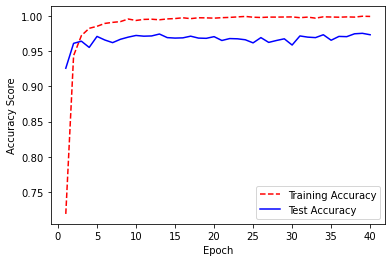

In [15]:
# Get training and test accuracy histories
training_accuracy = result.history['accuracy']
test_accuracy = result.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

## 10. Conclusion <a id="s10"></a>

We used data signals measured by smartphone sensors (accelerometer and gyroscope) worn by volunteers on their waist to predict typical human physical activites (walking, walking upstairs, walking downstairs, sitting, standing and lying).

In order to remove noise, we first applied a PCA decomposition on the dataset.

Then we built two machine learning models :

* A traditional model (linear SVM)
* A deep learning model (Multi Layer Perceptron)

We managed to reach a 96.4% prediction accuracy with the SVM model.

We very slightly improved the accuracy (up to 97.3%) with the deep learning model.